In [3]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import adaptedplot_solution_1, adaptedplot_solution_2

In this workspace, you will work with the fuel economy dataset from the previous lesson on bivariate plots.

In [4]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

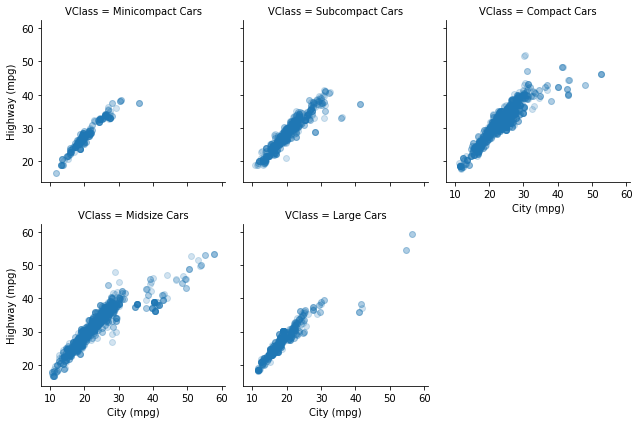

In [5]:
vclass_order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
g = sb.FacetGrid( data = fuel_econ, col = 'VClass', col_wrap = 3, col_order = vclass_order)
g.map(plt.scatter, 'city', 'highway', alpha = 1/5);
g.set_xlabels('City (mpg)');
g.set_ylabels('Highway (mpg)');

Due to overplotting, I've taken a faceting approach to this task. There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.


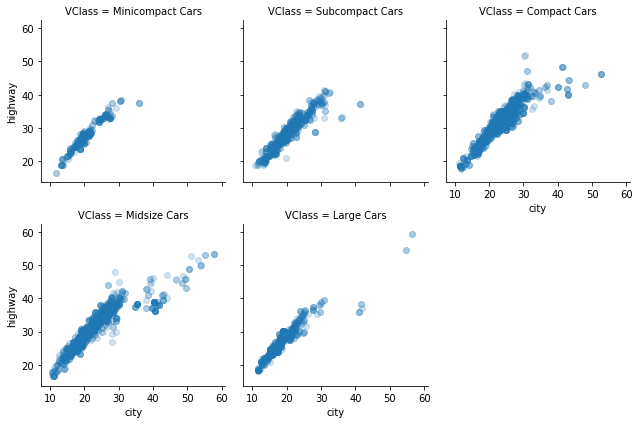

In [6]:
# run this cell to check your work against ours
adaptedplot_solution_1()

**Task 2**: Plot the relationship between engine size ('displ', in meters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [7]:
# VClass - categorical ordering by relative size
vclass_order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = vclass_order)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

In [8]:
# regular = fuel_econ['fuelType'] == 'Regular Gasoline'
# premium = fuel_econ['fuelType'] == 'Premium Gasoline'
# subset = fuel_econ [ regular | premium ]
# subset.describe()

In [9]:
# subset = fuel_econ [ ( fuel_econ['fuelType'] == 'Regular Gasoline' ) | ( fuel_econ['fuelType'] == 'Premium Gasoline' ) ]
# subset.describe()

In [10]:
subset = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
# subset.describe()
# subset.head()

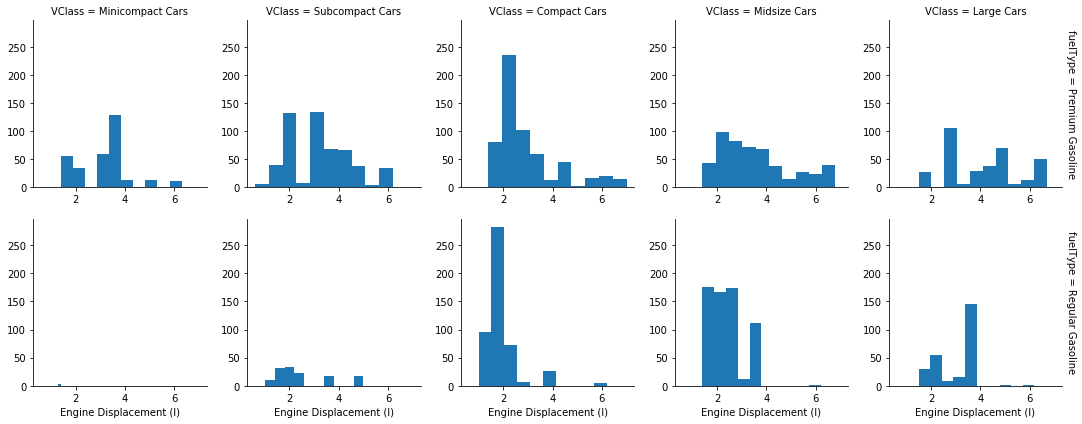

In [13]:
g = sb.FacetGrid( data = subset, col = 'VClass', row = 'fuelType', col_order = vclass_order, margin_titles = True)
g.map(plt.hist, 'displ');
# g.set_xlabels('City (mpg)');
g.set_xlabels('Engine Displacement (l)');

In [ ]:
ax = sb.boxplot(data = subset, x = 'VClass', y = 'displ', hue = 'fuelType')
# ax.legend(loc = 8, ncol = 3, framealpha = 1)
# plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
# loc = 6 is the same as 'center left'
#
# print(ax.get_position()) # Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)
bbox_to_side = (1.0,  # ax's right bounding box line
                0.5)  # centered vertically
# legend: bbox_to_anchor: A 2-tuple (x, y) places the corner of the legend specified by loc at x, y. 
#
# ax.legend(bbox_to_anchor = bbox_to_side, loc = 'center') # legend centered horizontally on figure's right bbox line
# 'center' - place legend's exact center point at the position specified by bbox_to_anchor  
ax.legend(bbox_to_anchor = bbox_to_side, loc = 'center left') # legend to right of figure
# 'center left' - place legend's left side. vertical center at the position specified by bbox_to_anchor  
plt.xticks(rotation = 15);

In [ ]:
# run this cell to check your work against ours
adaptedplot_solution_2()